In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
patient_injuries = pd.read_csv("data/train.csv", index_col=0)

In [3]:
patient_injuries

,bowel_healthy,bowel_injury,extravasation_healthy,extravasation_injury,kidney_healthy,kidney_low,kidney_high,liver_healthy,liver_low,liver_high,spleen_healthy,spleen_low,spleen_high,any_injury
patient_id,,,,,,,,,,,,,,
10004,1,0,0,1,0,1,0,1,0,0,0,0,1,1
10005,1,0,1,0,1,0,0,1,0,0,1,0,0,0
10007,1,0,1,0,1,0,0,1,0,0,1,0,0,0
10026,1,0,1,0,1,0,0,1,0,0,1,0,0,0
10051,1,0,1,0,1,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9951,1,0,1,0,1,0,0,1,0,0,1,0,0,0
9960,1,0,1,0,1,0,0,1,0,0,1,0,0,0
9961,1,0,1,0,1,0,0,1,0,0,1,0,0,0


# Correlation matrix

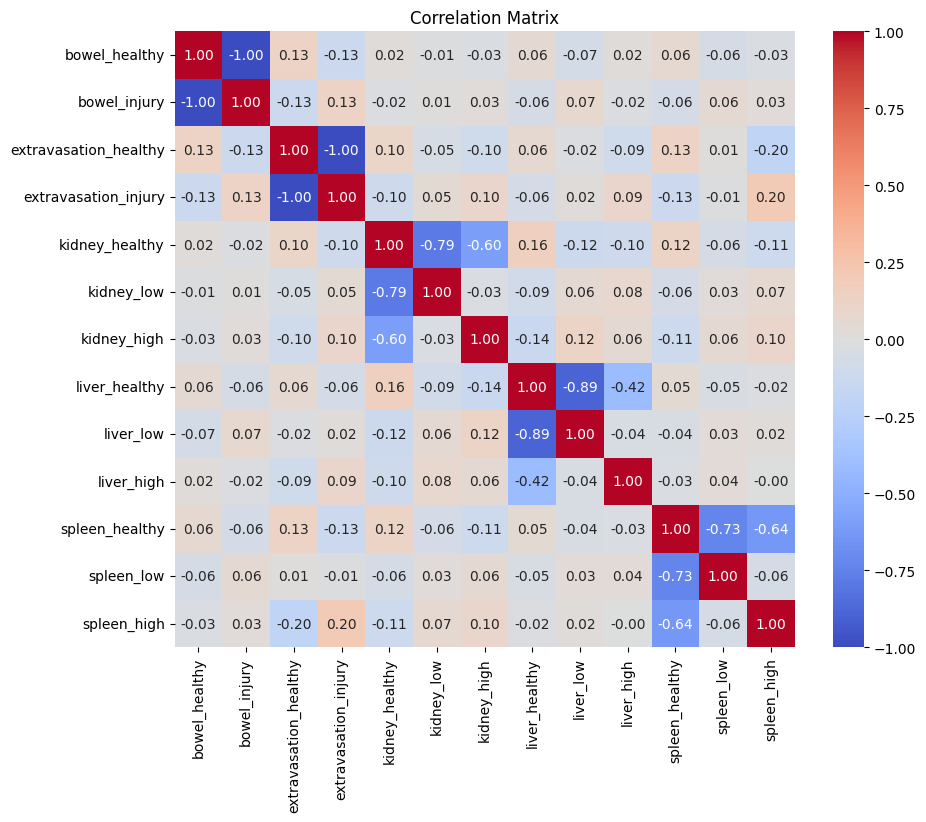

In [4]:
correlation_matrix = patient_injuries[[col for col in patient_injuries.columns if col != "any_injury"]].corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Compute possible splits

In [5]:
def get_summarization(body_part: str):
    assert body_part in ["bowel", "extravasation", "kidney", "liver", "spleen"]
    if body_part == "bowel":
        return patient_injuries["bowel_injury"]
    if body_part == "extravasation":
        return patient_injuries["extravasation_injury"]
    if body_part == "kidney":
        return patient_injuries["kidney_low"] + 2 * patient_injuries["kidney_high"]
    if body_part == "liver":
        return patient_injuries["liver_low"] + 2 * patient_injuries["liver_high"]
    if body_part == "spleen":
        return patient_injuries["spleen_low"] + 2 * patient_injuries["spleen_high"]

def get_summarization_string(body_parts: dict[str, bool]):
    label_str = ""
    summary = pd.Series("", index = patient_injuries.index)
    for body_part in body_parts:
        if body_parts[body_part]:
            if label_str != "":
                label_str += "_"
                summary = summary + "_"
            label_str += body_part
            summary = summary + get_summarization(body_part).astype(str)

    return label_str, summary

In [6]:
summary_columns = []
for bowel in [True, False]:
    for extravasation in [True, False]:
        for kidney in [True, False]:
            for liver in [True, False]:
                for spleen in [True, False]:
                    body_parts = {"bowel": bowel, "extravasation": extravasation, "kidney": kidney,
                                     "liver": liver, "spleen": spleen}
                    if sum([int(body_parts[body_part]) for body_part in body_parts]) > 0:
                        label_str, summary = get_summarization_string(body_parts)
                        patient_injuries[label_str] = summary
                        summary_columns.append(label_str)

In [7]:
patient_injuries

,bowel_healthy,bowel_injury,extravasation_healthy,extravasation_injury,kidney_healthy,kidney_low,kidney_high,liver_healthy,liver_low,liver_high,...,extravasation_liver,extravasation_spleen,extravasation,kidney_liver_spleen,kidney_liver,kidney_spleen,kidney,liver_spleen,liver,spleen
patient_id,,,,,,,,,,,,,,,,,,,,,
10004,1,0,0,1,0,1,0,1,0,0,...,1_0,1_2,1,1_0_2,1_0,1_2,1,0_2,0,2
10005,1,0,1,0,1,0,0,1,0,0,...,0_0,0_0,0,0_0_0,0_0,0_0,0,0_0,0,0
10007,1,0,1,0,1,0,0,1,0,0,...,0_0,0_0,0,0_0_0,0_0,0_0,0,0_0,0,0
10026,1,0,1,0,1,0,0,1,0,0,...,0_0,0_0,0,0_0_0,0_0,0_0,0,0_0,0,0
10051,1,0,1,0,1,0,0,1,0,0,...,0_0,0_1,0,0_0_1,0_0,0_1,0,0_1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9951,1,0,1,0,1,0,0,1,0,0,...,0_0,0_0,0,0_0_0,0_0,0_0,0,0_0,0,0
9960,1,0,1,0,1,0,0,1,0,0,...,0_0,0_0,0,0_0_0,0_0,0_0,0,0_0,0,0
9961,1,0,1,0,1,0,0,1,0,0,...,0_0,0_0,0,0_0_0,0_0,0_0,0,0_0,0,0


# Plot all possible splits

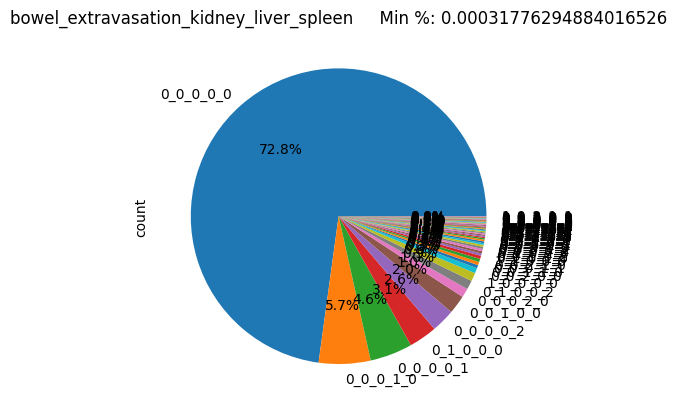

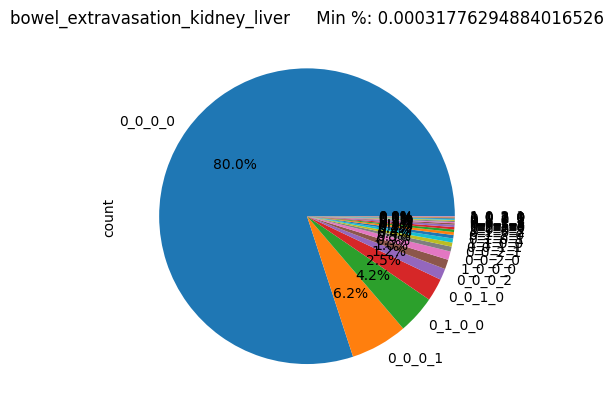

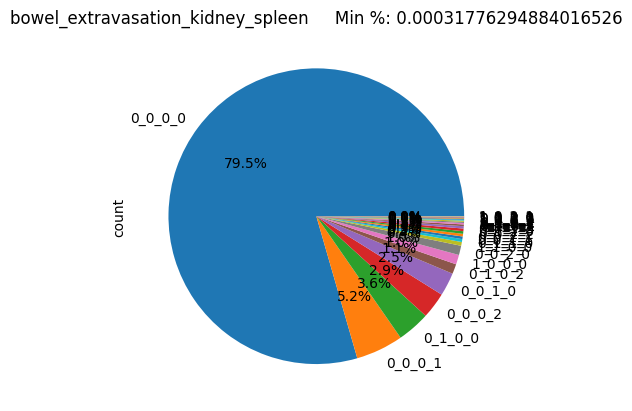

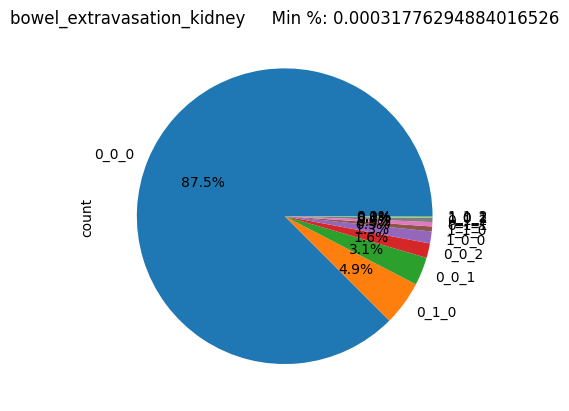

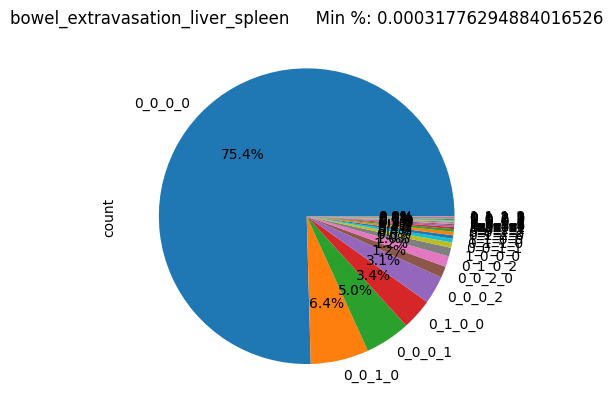

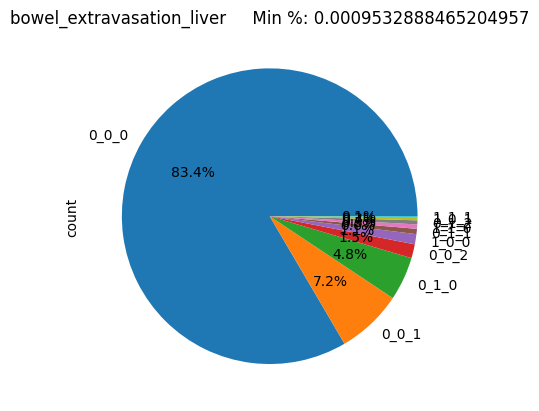

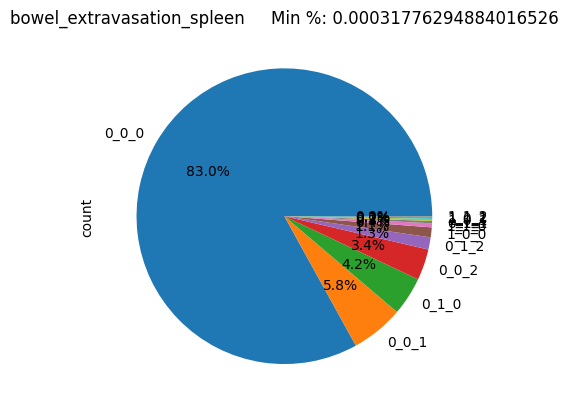

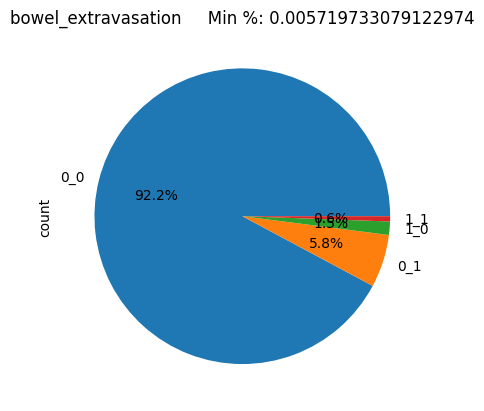

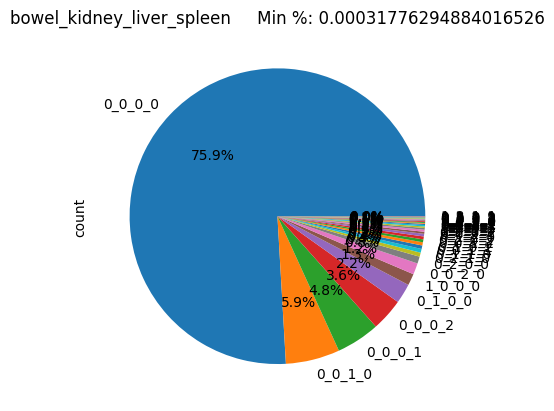

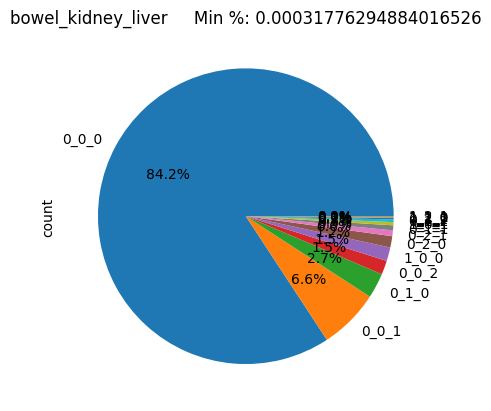

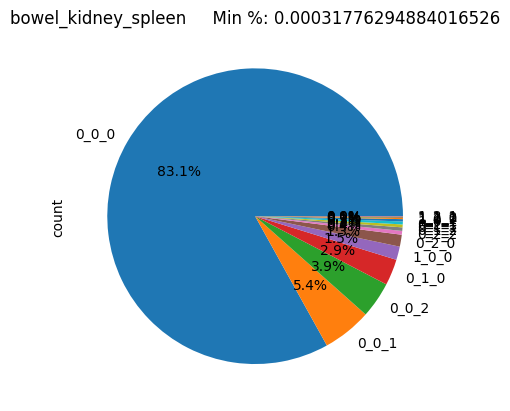

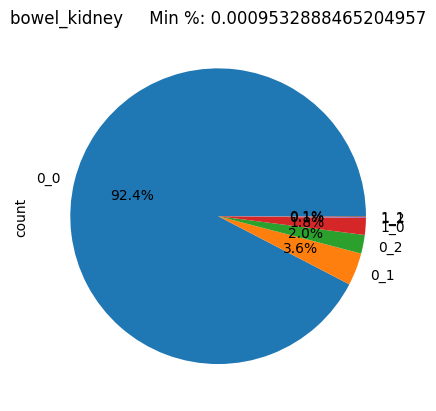

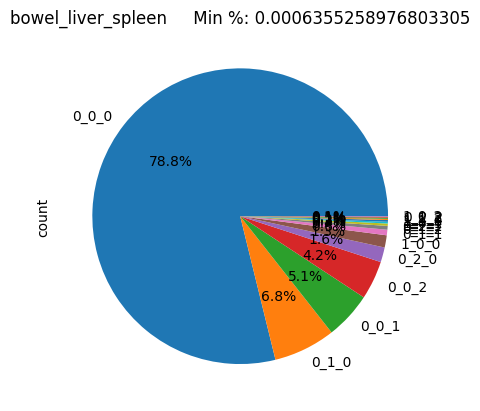

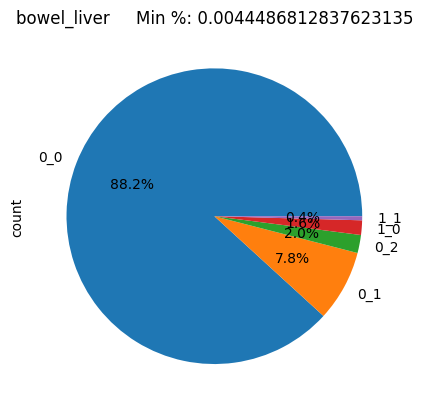

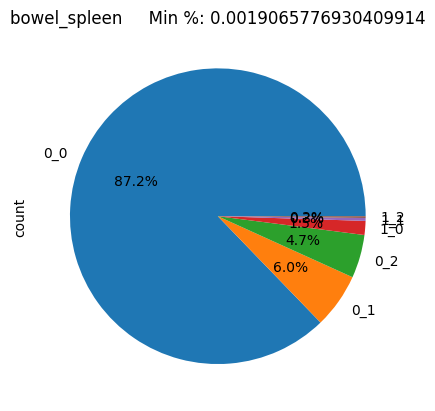

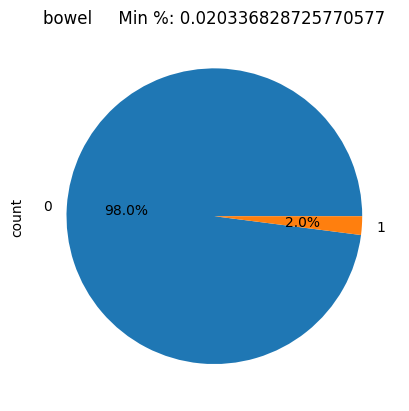

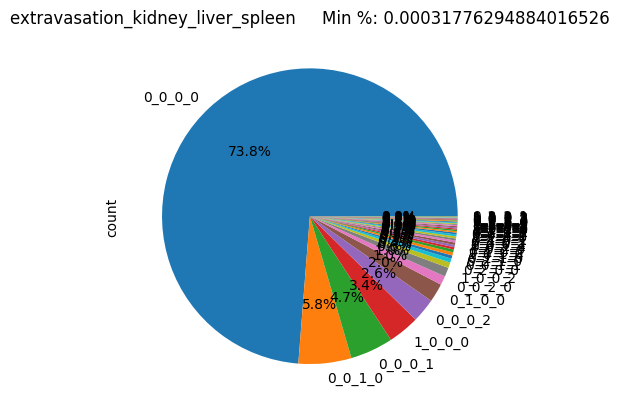

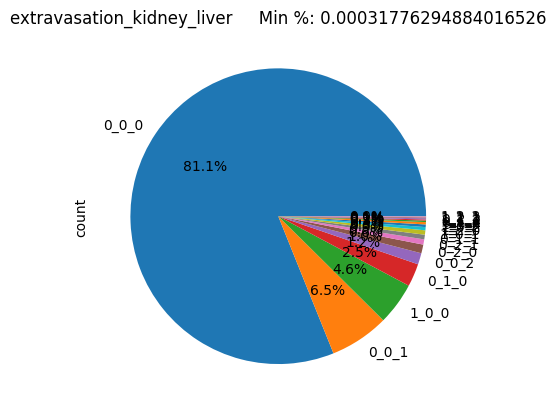

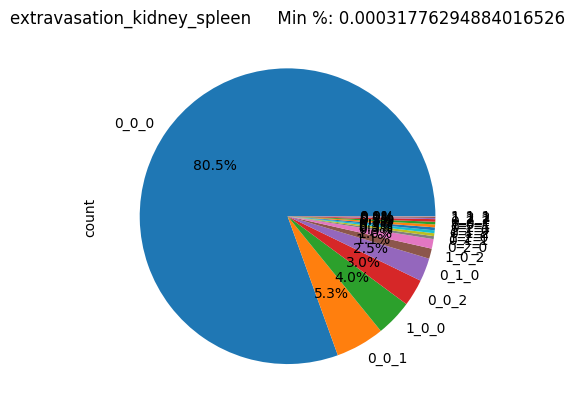

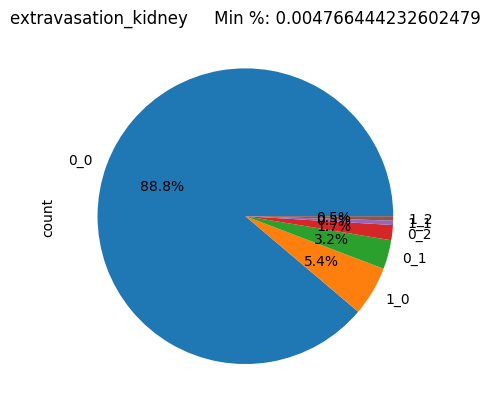

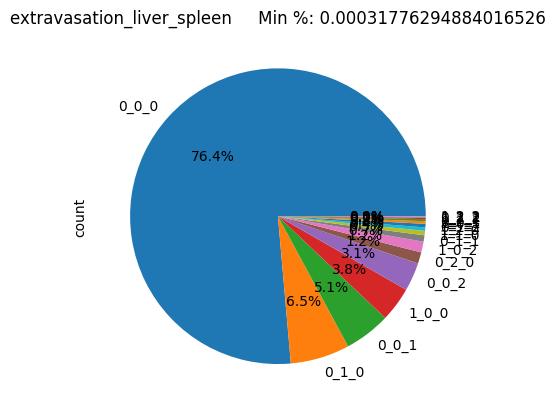

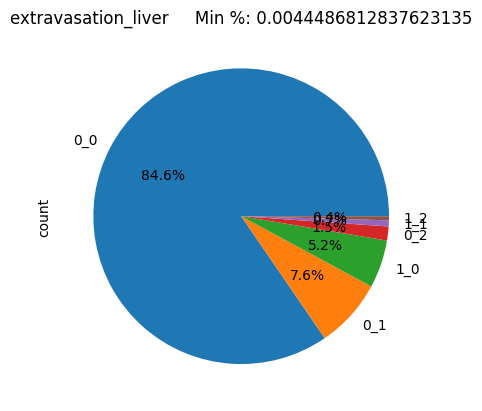

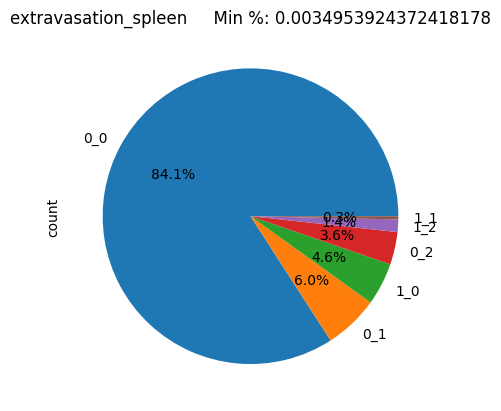

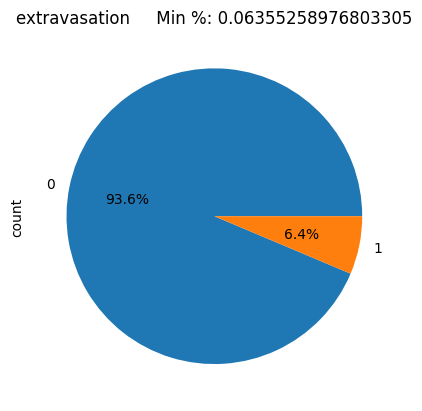

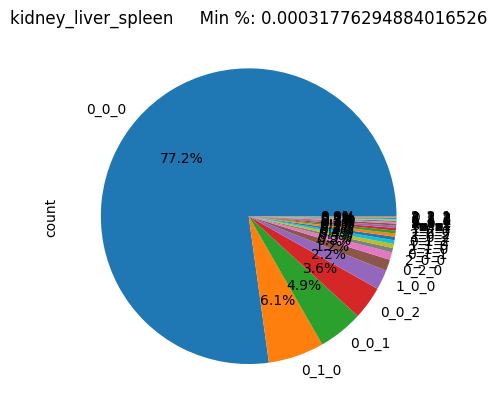

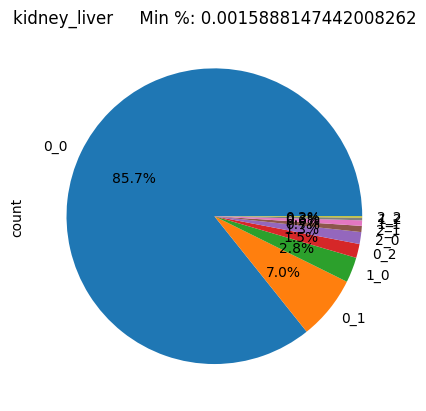

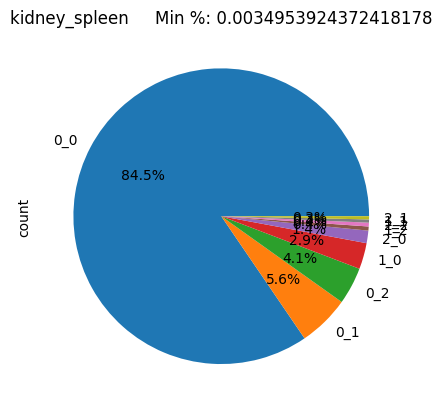

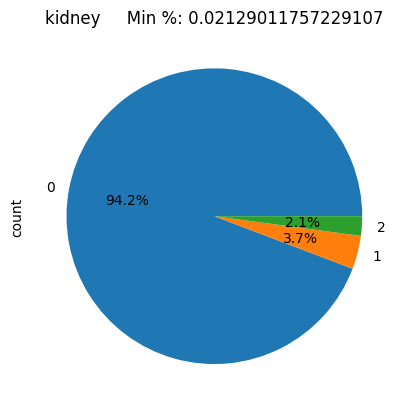

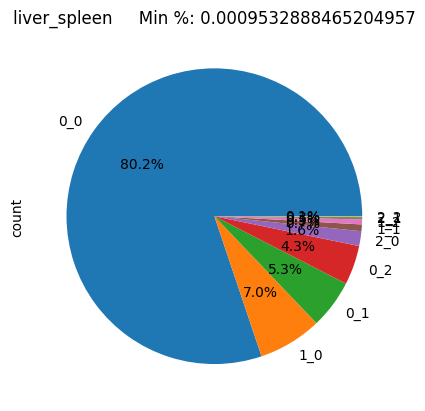

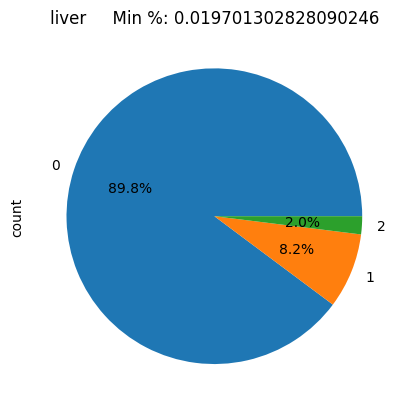

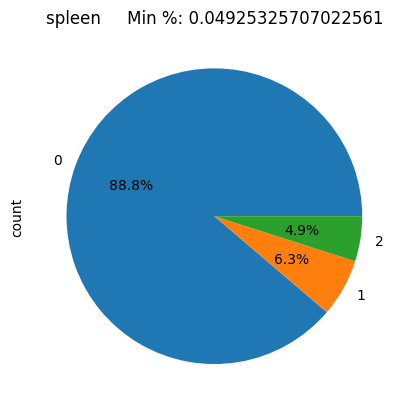

In [16]:
def plot_col(col):
    counts = patient_injuries[col].value_counts()
    min_ratio = counts.min() / counts.sum()
    counts.plot.pie(autopct='%1.1f%%')
    plt.title("{}     Min %: {}".format(col, min_ratio))
    plt.show()
for col in summary_columns:
    plot_col(col)